Data Source: https://www.zillow.com/research/data/

## Inventory and Sales Definitions
- **Median Sale Price ($):** Median of the selling price for all homes sold in a given region.
- **Median price cut (%):** Median of the percentage price reduction for homes with a price reduction during the month.
- **Foreclosure Resales (%):** The percentage of home sales in a given month in which the home was foreclosed upon within the previous year (e.g. sales of bank-owned homes after the bank took possession of a home following a foreclosure).
- **Monthly Inventory:** The count of unique listings that were active at any time in a given month.
- **New Monthly Inventory:** The count of unique listings that were newly listed at any time in a given month.
- **Median Daily Inventory:** Each Wednesday, daily inventory is calculated as the number of currently active listings. These counts are then aggregated into the number reported by taking the median across weekly values.
- **Age of Inventory:** Each Wednesday, age of inventory is calculated as the median number of days all active listings as of that Wednesday have been current. These medians are then aggregated into the number reported by taking the median across weekly values.
- **Days on Zillow:** The median days on market of homes sold within a given month, including foreclosure re-sales. The latest data is for one month prior to the current ZHVI (e.g., if the most current month for ZHVI data is January, the most current month for Days on Zillow data will be December).
- **Home Sales:** The number of homes sold during a given month. 
**Note:** ZIP code sales data is not latency adjusted, but is filtered.
- **Home Sales, SA:** The number of homes sold during the given month, seasonally adjusted using the X-12-Arima method.
- **Zillow Home Value Forecast (ZHVF):** The ZHVF is the one-year forecast of the ZHVI.

In [138]:
# import libraries
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib.pylab import plt 
import random
%matplotlib inline 

## Geography by County

In [186]:
path = 'zillow_data/inventory_and_sales_byCounty_051220/'

### Median Sale Price - Seasonally Adjusted ($)

In [187]:
# read data
data = pd.read_csv(path + 'Sale_Prices_County.csv')
data.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
0,3101,Los Angeles County,California,1,459000.0,448700.0,432300.0,419300.0,403300.0,388100.0,...,602800.0,606400.0,608700.0,613100.0,611300.0,616500.0,625400.0,633000.0,639900.0,NaN
1,139,Cook County,Illinois,2,278900.0,274500.0,253100.0,240200.0,233400.0,233300.0,...,235400.0,228800.0,229900.0,229600.0,232400.0,233700.0,239700.0,243900.0,255600.0,267100.0
2,1090,Harris County,Texas,3,137000.0,135400.0,132400.0,132600.0,133000.0,134600.0,...,209900.0,209400.0,209200.0,209200.0,212600.0,214600.0,218400.0,219400.0,221300.0,NaN
3,2402,Maricopa County,Arizona,4,231000.0,221400.0,212300.0,207400.0,200700.0,195600.0,...,251100.0,254600.0,255600.0,258100.0,260900.0,265800.0,269100.0,274700.0,281300.0,NaN
4,2841,San Diego County,California,5,404200.0,396900.0,381900.0,370000.0,353500.0,341300.0,...,563500.0,561600.0,564200.0,562200.0,568700.0,576500.0,581700.0,585500.0,588200.0,NaN


In [193]:
# US average
us_avg = np.nanmean(data.iloc[:,4:], axis=0)

# average by state
states_avg = data.iloc[:,2:].groupby(['StateName'], axis=0).mean().drop(['SizeRank'], axis=1)

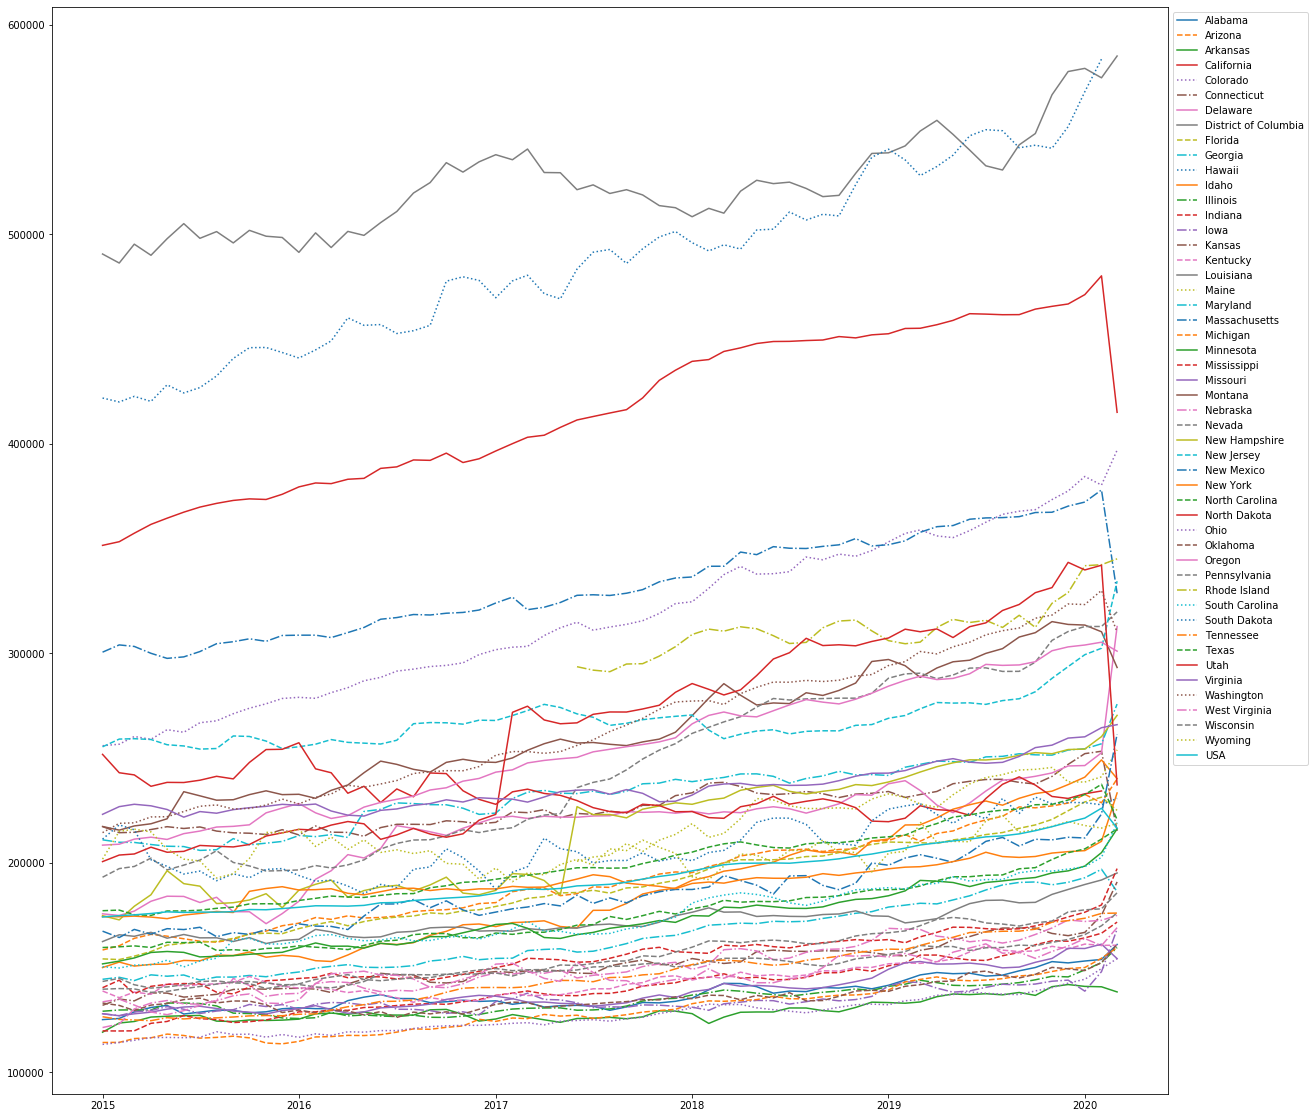

In [207]:
# define year range
from_ = 2015
to_ = 2020

# define year indices
years = [str(i) for i in range(from_, to_+1, 1)]
years_idx = [i for i, x in enumerate([y.split('-')[0] in years for y in states_avg.columns]) if x]

# get data for year range
us_avg_temp = us_avg[years_idx]
states_avg_temp = states_avg.iloc[:, years_idx]

# split into x and y
states = states_avg_temp.index
dates = [datetime.strptime(i, '%Y-%m') for i in states_avg_temp.columns]

# line plots
plt.figure(figsize=(20,20))
for c in states:
    
    L = random.choice(['solid', 'dashed', 'dashdot', 'dotted'])
    
    plt.plot(dates, states_avg_temp.loc[c].values, label=c, linestyle=L)

plt.plot(dates, us_avg_temp, label = 'USA')
    
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Geography by Zip Code

In [367]:
path = 'zillow_data/inventory_and_sales_byZipcode_051220/'

In [388]:
# read html page with zip codes
"""
source: http://www.sdcourt.ca.gov/portal/page?_pageid=55,1524259&_dad=portal&_schema=PORTAL
"""

zip_html_raw = pd.read_html('zillow_data/inventory_and_sales_byZipcode_051220/html_SD_zip_code.html')

# manipulate column names and pandas dataframes
cols = zip_html_raw[0].columns
cols1 = cols[:3]
cols2 = cols[3:6]
cols3 = cols[6:9]

df1 = zip_html_raw[0][cols1].iloc[58:]
df2 = zip_html_raw[0][cols2].iloc[58:]
df2.columns = cols1
df3 = zip_html_raw[0][cols3].iloc[58:120]
df3.columns = cols1

# create dataframe with zip codes
zip_html = pd.concat([df1, df2, df3], axis = 0)

# clean names


zip_html.head()

,ZIP CODE,NAME,VENUE
58,91901.0,ALPINE,EAST
59,91902.0,BONITA,SOUTH
60,91903.0,ALPINE (POB),EAST
61,91905.0,BOULEVARD,EAST
62,91906.0,CAMPO,EAST


In [397]:
set(zip_html['NAME'])

{'*EL CAJON (Travel Lodge)',
 '*LA JOLLA (UCSD)',
 '*SAN DIEGO',
 '*SAN MARCOS (CSUSM)',
 '*SD (32nd St. Naval Station)',
 '*SD, (ASW Training Center)',
 '*SD, (County Jail)',
 '*SD, (Miramar Air Station)',
 '*SD, (Naval Amphibious Base)',
 '*SD, (Naval Hospital)',
 '*SD, (Naval Supply Center)',
 '*SD, (SD Water Utilities)',
 '*SD, (SDG&E)',
 '*SD, (SDSU)',
 '*SD, (SPAWARS System Center)',
 '*SD, (VA Hospital)',
 '*TECATE (TK Manufacturing)',
 'ALPINE',
 'ALPINE (POB)',
 'BONITA',
 'BONITA (POB)',
 'BONSALL',
 'BORREGO SPGS/OCOTILLO WELLS',
 'BOULEVARD',
 'CAMP PENDLETON',
 'CAMPO',
 'CARDIFF-BY-THE-SEA',
 'CARLSBAD',
 'CARLSBAD (POB)',
 'CHULA VISTA',
 'CHULA VISTA (POB)',
 'CORONADO',
 'CORONADO (POB)',
 'DEL MAR',
 'DESCANSO',
 'DONOVAN CORR. FACILITY (POB)',
 'DULZURA',
 'EL CAJON',
 'EL CAJON (POB)',
 'ENCINITAS',
 'ENCINITAS (POB)',
 'ESCONDIDO',
 'ESCONDIDO (POB)',
 'FALLBROOK',
 'FALLBROOK (POB)',
 'GUATAY (POB)',
 'IMPERIAL BEACH',
 'IMPERIAL BEACH (POB)',
 'JACUMBA',
 'JAMUL'